In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
from prettytable import PrettyTable
plt.style.use('seaborn')
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,Fever,BodyPain,Age,RunnyNose,DifficultBreathing,InfectionProb
0,99.308549,1,36,0,0,0
1,100.393428,1,99,1,1,1
2,100.497924,0,9,0,0,0
3,101.348216,1,21,1,0,0
4,100.186253,0,19,1,1,1


In [4]:
df.tail()

,Fever,BodyPain,Age,RunnyNose,DifficultBreathing,InfectionProb
3994,100.123355,1,54,1,1,1
3995,99.253443,0,88,0,1,1
3996,98.738339,1,89,0,0,0
3997,99.514991,1,80,0,1,1
3998,101.484046,0,94,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fever               3999 non-null   float64
 1   BodyPain            3999 non-null   int64  
 2   Age                 3999 non-null   int64  
 3   RunnyNose           3999 non-null   int64  
 4   DifficultBreathing  3999 non-null   int64  
 5   InfectionProb       3999 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 187.6 KB


In [6]:
df['DifficultBreathing'].value_counts()

0    2008
1    1991
Name: DifficultBreathing, dtype: int64

In [7]:
df.describe()

,Fever,BodyPain,Age,RunnyNose,DifficultBreathing,InfectionProb
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,99.982944,0.515879,50.945236,0.495624,0.497874,0.300825
std,1.135907,0.499810,28.939869,0.500043,0.500058,0.458674
min,98.000940,0.000000,1.000000,0.000000,0.000000,0.000000
25%,99.025859,0.000000,25.000000,0.000000,0.000000,0.000000
50%,99.985794,1.000000,51.000000,0.000000,0.000000,0.000000
75%,100.931952,1.000000,76.000000,1.000000,1.000000,1.000000
max,101.999906,1.000000,100.000000,1.000000,1.000000,1.000000


In [8]:
import numpy as np

In [9]:
def data_split(data,ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
train,test=data_split(df,0.2)

In [11]:
train

,Fever,BodyPain,Age,RunnyNose,DifficultBreathing,InfectionProb
2990,99.880475,1,7,0,0,0
1575,100.863296,1,72,0,1,1
506,100.526939,1,90,1,0,0
3593,98.970704,0,71,0,0,0
3562,98.475208,1,19,1,1,0
...,...,...,...,...,...,...
1130,98.109092,0,69,0,1,0
1294,101.008643,1,58,1,1,1
860,101.294014,0,71,0,1,1
3507,100.931914,1,55,0,0,0


In [12]:
test

,Fever,BodyPain,Age,RunnyNose,DifficultBreathing,InfectionProb
1760,101.262940,0,60,1,0,0
3326,99.025330,1,97,1,0,0
1770,100.515891,0,52,0,1,1
3176,100.435001,1,96,0,0,0
2099,100.635737,1,81,1,0,0
...,...,...,...,...,...,...
1602,101.559623,1,51,1,1,1
2510,100.865979,0,45,1,1,1
2752,100.444859,0,69,1,1,0
1869,101.698937,0,39,1,0,0


In [13]:
X_train= train[['Fever','BodyPain','Age','RunnyNose','DifficultBreathing']]
X_test= test[['Fever','BodyPain','Age','RunnyNose','DifficultBreathing']]

In [14]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [15]:
X_train

array([[ 99.88047463,   1.        ,   7.        ,   0.        ,
          0.        ],
       [100.8632964 ,   1.        ,  72.        ,   0.        ,
          1.        ],
       [100.5269395 ,   1.        ,  90.        ,   1.        ,
          0.        ],
       ...,
       [101.2940137 ,   0.        ,  71.        ,   0.        ,
          1.        ],
       [100.9319135 ,   1.        ,  55.        ,   0.        ,
          0.        ],
       [101.9618885 ,   0.        ,  81.        ,   1.        ,
          0.        ]])

In [16]:
Y_train= train[['InfectionProb']]
Y_test= test[['InfectionProb']]

In [17]:
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [18]:
Y_train.reshape(3200 ,)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
Y_test.reshape(799,)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf=LogisticRegression()
clf.fit(X_train,Y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
print("Accuracy of our model:",clf.score(X_test,Y_test))

Accuracy of our model: 0.8961201501877347


In [94]:
inputFeatures=[102,1,22,1,1]
infProb=clf.predict_proba([inputFeatures])[0][1]
print(f'Probability of infection is : {round(infProb*100)} %')

Probability of infection is : 99.0 %


In [24]:
url = 'https://www.mohfw.gov.in/'
web_content = requests.get(url).content
soup = BeautifulSoup(web_content, "html.parser")
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) 
    if len(stat) == 5:
        stats.append(stat)
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.head()

,Sr.No,States/UT,Confirmed,Recovered,Deceased
0,1,Andaman and Nicobar Islands,16,11,0
1,2,Andhra Pradesh,757,96,22
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,35,19,1
4,5,Bihar,126,42,2


In [25]:
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased'] = state_data['Deceased'].map(int)

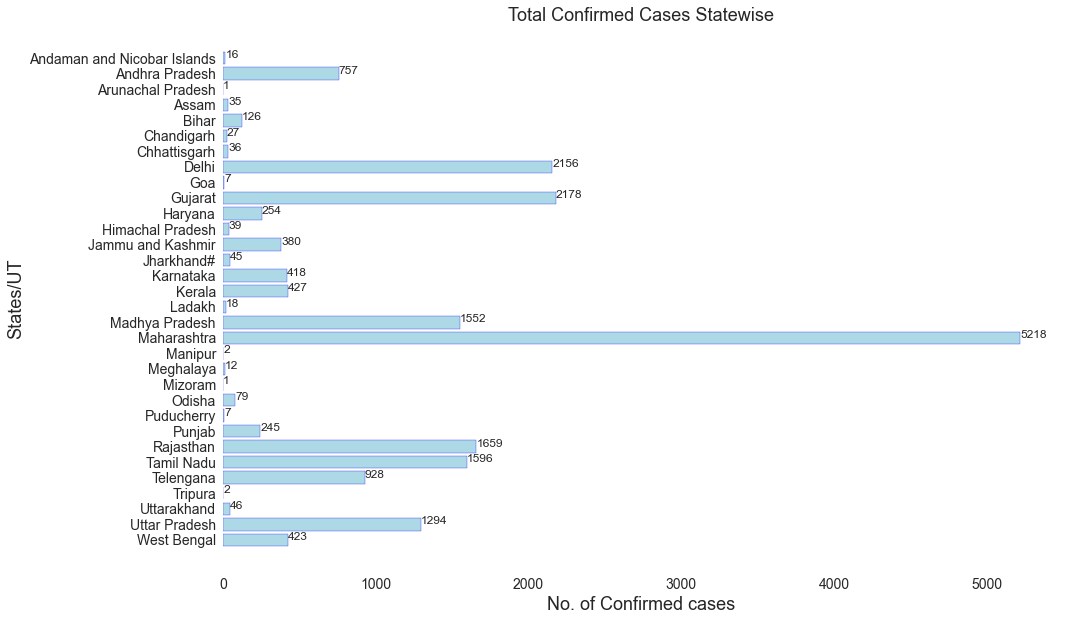

In [26]:
sns.set_style('ticks')
plt.figure(figsize = (15,10))
plt.barh(state_data['States/UT'],    state_data['Confirmed'].map(int),align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 18 )
for index, value in enumerate(state_data['Confirmed']):
    plt.text(value, index, str(value), fontsize = 12)
plt.show()

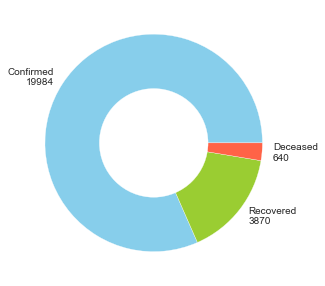

In [27]:
group_size = [sum(state_data['Confirmed']),
              sum(state_data['Recovered']),
              sum(state_data['Deceased'])]
group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])),
                'Recovered\n' + str(sum(state_data['Recovered'])),
                'Deceased\n' + str(sum(state_data['Deceased']))]
custom_colors = ['skyblue','yellowgreen','tomato']
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.savefig('static/india_pie2.png')

In [28]:
map_data = gpd.read_file('Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

,States/UT,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [29]:
map_data['States/UT'] = map_data['States/UT'].str.replace('&','and')
map_data['States/UT'].replace('Arunanchal Pradesh',
                              'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 
                              'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 
                              'Delhi', inplace = True)
map_data['States/UT'].replace('Andaman and Nicobar Island', 
                              'Andaman and Nicobar Islands', 
                               inplace = True)

In [30]:
merged_data = pd.merge(map_data, state_data, 
                       how = 'left', on = 'States/UT')
# merged_data.fillna(0, inplace = True)
merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()

,States/UT,geometry,Confirmed,Recovered,Deceased
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",16.0,11.0,0.0
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",1.0,1.0,0.0
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",35.0,19.0,1.0
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",126.0,42.0,2.0
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",27.0,14.0,0.0


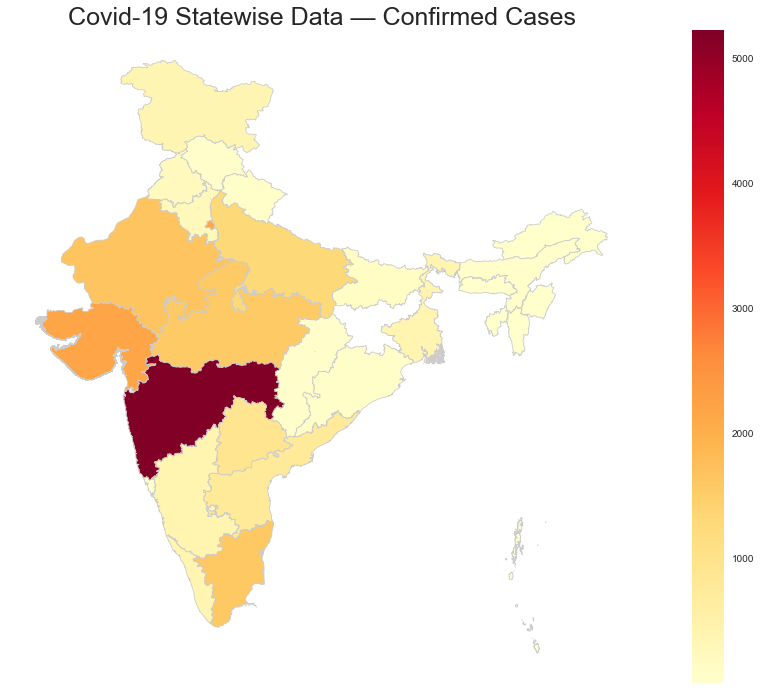

In [31]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data — Confirmed Cases', 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend = True)
plt.show()

In [32]:
confirmed_cases=pd.read_csv('time_series_covid_19_confirmed.csv')
deaths_reported=pd.read_csv('time_series_covid_19_deaths.csv')
recovered_cases=pd.read_csv('time_series_covid_19_recovered.csv')

In [33]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


In [34]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,6,6,7,7,11,14,14,15,15
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,15,16,17,20,20,21,22,22,23,23
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,58,86,105,130,152,173,193,205,235,256
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,14,15,16,17,18,21,22,23,25,26
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [35]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,5,10,10,10,15,18,18,29,32,32
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,67,76,89,99,104,116,131,154,165,182
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,61,61,62,90,90,90,113,237,347,405
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,10,10,16,21,26,31,39,52,58,71
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2


In [36]:
cols_confirmedcases=confirmed_cases.columns
cols_confirmedcases

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [37]:
cols_deathsreported=deaths_reported.columns
cols_deathsreported

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [38]:
cols_recoveredcases=recovered_cases.columns
cols_recoveredcases

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [39]:
confirmed=confirmed_cases.loc[:,cols_confirmedcases[4]:]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,0,0,0,0,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
1,0,0,0,0,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
2,0,0,0,0,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,0,0,0,0,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
4,0,0,0,0,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


In [40]:
deaths=deaths_reported.loc[:,cols_deathsreported[4]:]
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,0,0,0,0,0,0,0,0,0,0,...,4,6,6,7,7,11,14,14,15,15
1,0,0,0,0,0,0,0,0,0,0,...,15,16,17,20,20,21,22,22,23,23
2,0,0,0,0,0,0,0,0,0,0,...,58,86,105,130,152,173,193,205,235,256
3,0,0,0,0,0,0,0,0,0,0,...,14,15,16,17,18,21,22,23,25,26
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [41]:
recovered=recovered_cases.loc[:,cols_recoveredcases[4]:]
recovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,0,0,0,0,0,0,0,0,0,0,...,5,10,10,10,15,18,18,29,32,32
1,0,0,0,0,0,0,0,0,0,0,...,67,76,89,99,104,116,131,154,165,182
2,0,0,0,0,0,0,0,0,0,0,...,61,61,62,90,90,90,113,237,347,405
3,0,0,0,0,0,0,0,0,0,0,...,10,10,16,21,26,31,39,52,58,71
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2


In [42]:
dates=confirmed.columns
world_cases=[]
total_deaths=[]
mortality_rate=[]
total_recovered=[]

for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    

In [43]:
confirmed_sum

1691719

In [44]:
death_sum

102525

In [45]:
recovered_sum

376096

In [46]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145205,
 156101,
 167454,
 181574,
 197102,
 214821,
 242570,
 272208,
 304507,
 336953,
 378235,
 418045,
 467653,
 529591,
 593291,
 660693,
 720140,
 782389,
 857487,
 932605,
 1013466,
 1095917,
 1197408,
 1272115,
 1345101,
 1426096,
 1511104,
 1595350,
 1691719]

In [47]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2007,
 2122,
 2247,
 2251,
 2458,
 2469,
 2629,
 2708,
 2770,
 2814,
 2872,
 2941,
 2996,
 3085,
 3160,
 3254,
 3348,
 3460,
 3558,
 3802,
 3988,
 4262,
 4615,
 4720,
 5404,
 5819,
 6440,
 7126,
 7905,
 8733,
 9867,
 11299,
 12973,
 14651,
 16505,
 18625,
 21181,
 23970,
 27198,
 30652,
 33925,
 37582,
 42107,
 46809,
 52983,
 58787,
 64606,
 69374,
 74565,
 81865,
 88338,
 95455,
 102525]

In [48]:
total_recovered

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58358,
 60694,
 62494,
 64404,
 67003,
 68324,
 70251,
 72624,
 76034,
 78088,
 80840,
 83312,
 84975,
 87420,
 91692,
 97899,
 98351,
 108000,
 113787,
 122150,
 130915,
 139415,
 149082,
 164566,
 178034,
 193177,
 210263,
 225796,
 246152,
 260012,
 276515,
 300054,
 328661,
 353975,
 376096]

In [49]:
days_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [50]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [51]:
world_cases

array([[    555],
       [    654],
       [    941],
       [   1434],
       [   2118],
       [   2927],
       [   5578],
       [   6166],
       [   8234],
       [   9927],
       [  12038],
       [  16787],
       [  19881],
       [  23892],
       [  27635],
       [  30794],
       [  34391],
       [  37120],
       [  40150],
       [  42762],
       [  44802],
       [  45221],
       [  60368],
       [  66885],
       [  69030],
       [  71224],
       [  73258],
       [  75136],
       [  75639],
       [  76197],
       [  76819],
       [  78572],
       [  78958],
       [  79561],
       [  80406],
       [  81388],
       [  82746],
       [  84112],
       [  86011],
       [  88369],
       [  90306],
       [  92840],
       [  95120],
       [  97886],
       [ 101801],
       [ 105847],
       [ 109821],
       [ 113590],
       [ 118620],
       [ 125875],
       [ 128352],
       [ 145205],
       [ 156101],
       [ 167454],
       [ 181574],
       [ 1

In [52]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2007],
       [  2122],
       [  2247],
       [  2251],
       [  2458],
       [  2469],
       [  2629],
       [  2708],
       [  2770],
       [  2814],
       [  2872],
       [  2941],
       [  2996],
       [  3085],
       [  3160],
       [  3254],
       [  3348],
       [  3460],
       [  3558],
       [  3802],
       [  3988],
       [  4262],
       [  4615],
       [  4720],
       [  5404],
       [  5819],
       [  6440],
       [  7126],
       [  7905],
       [  8733],
       [  9867],
       [ 11299

In [53]:
total_recovered

array([[    28],
       [    30],
       [    36],
       [    39],
       [    52],
       [    61],
       [   107],
       [   126],
       [   143],
       [   222],
       [   284],
       [   472],
       [   623],
       [   852],
       [  1124],
       [  1487],
       [  2011],
       [  2616],
       [  3244],
       [  3946],
       [  4683],
       [  5150],
       [  6295],
       [  8058],
       [  9395],
       [ 10865],
       [ 12583],
       [ 14352],
       [ 16121],
       [ 18177],
       [ 18890],
       [ 22886],
       [ 23394],
       [ 25227],
       [ 27905],
       [ 30384],
       [ 33277],
       [ 36711],
       [ 39782],
       [ 42716],
       [ 45602],
       [ 48228],
       [ 51170],
       [ 53796],
       [ 55865],
       [ 58358],
       [ 60694],
       [ 62494],
       [ 64404],
       [ 67003],
       [ 68324],
       [ 70251],
       [ 72624],
       [ 76034],
       [ 78088],
       [ 80840],
       [ 83312],
       [ 84975],
       [ 87420

In [54]:
days_in_future=10
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]

In [55]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [56]:
start='1/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


In [57]:
latest_confirmed=confirmed_cases[dates[-1]]
latest_deaths=deaths_reported[dates[-1]]
latest_recovered=recovered_cases[dates[-1]]

In [58]:
latest_confirmed

0       521
1       416
2      1761
3       601
4        19
       ... 
259       1
260       4
261       4
262       4
263       1
Name: 4/10/20, Length: 264, dtype: int64

In [59]:
latest_deaths

0       15
1       23
2      256
3       26
4        2
      ... 
259      0
260      0
261      0
262      0
263      0
Name: 4/10/20, Length: 264, dtype: int64

In [60]:
latest_recovered

0       32
1      182
2      405
3       71
4        2
      ... 
245      0
246      0
247      0
248      0
249      0
Name: 4/10/20, Length: 250, dtype: int64

In [61]:
unique_countries=list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [62]:
country_confirmed_cases=[]
no_cases=[]
for i in unique_countries:
    cases=latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

unique_countries=[k for k,v in sorted(zip(unique_countries,country_confirmed_cases),key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [63]:
print('Confirmed Cases by Country/Regions:\n')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]} : {country_confirmed_cases[i]} cases')

Confirmed Cases by Country/Regions:

US : 496535 cases
Spain : 158273 cases
Italy : 147577 cases
France : 125931 cases
Germany : 122171 cases
China : 82941 cases
United Kingdom : 74605 cases
Iran : 68192 cases
Turkey : 47029 cases
Belgium : 26667 cases
Switzerland : 24551 cases
Netherlands : 23249 cases
Canada : 22059 cases
Brazil : 19638 cases
Portugal : 15472 cases
Austria : 13555 cases
Russia : 11917 cases
Korea, South : 10450 cases
Israel : 10408 cases
Sweden : 9685 cases
Ireland : 8089 cases
India : 7598 cases
Ecuador : 7161 cases
Chile : 6501 cases
Norway : 6314 cases
Australia : 6215 cases
Denmark : 6014 cases
Poland : 5955 cases
Peru : 5897 cases
Czechia : 5732 cases
Japan : 5530 cases
Romania : 5467 cases
Pakistan : 4695 cases
Malaysia : 4346 cases
Philippines : 4195 cases
Saudi Arabia : 3651 cases
Indonesia : 3512 cases
Mexico : 3441 cases
United Arab Emirates : 3360 cases
Luxembourg : 3223 cases
Serbia : 3105 cases
Finland : 2769 cases
Panama : 2752 cases
Dominican Republic 

In [64]:
unique_provinces=list(confirmed_cases['Province/State'].unique())

In [65]:
province_confirmed_cases=[]
no_cases=[]

for i in unique_provinces:
    cases=latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_provinces.remove(i)

In [66]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]} : {province_confirmed_cases[i]} cases')

Australian Capital Territory : 103 cases
New South Wales : 2822 cases
Northern Territory : 28 cases
Queensland : 965 cases
South Australia : 428 cases
Tasmania : 122 cases
Victoria : 1241 cases
Western Australia : 506 cases
Alberta : 1451 cases
British Columbia : 1370 cases
Grand Princess : 13 cases
Manitoba : 230 cases
New Brunswick : 112 cases
Newfoundland and Labrador : 239 cases
Nova Scotia : 407 cases
Ontario : 6237 cases
Prince Edward Island : 25 cases
Quebec : 11677 cases
Saskatchewan : 285 cases
Anhui : 991 cases
Beijing : 588 cases
Chongqing : 579 cases
Fujian : 351 cases
Gansu : 139 cases
Guangdong : 1544 cases
Guangxi : 254 cases
Guizhou : 146 cases
Hainan : 168 cases
Hebei : 327 cases
Heilongjiang : 638 cases
Henan : 1276 cases
Hong Kong : 989 cases
Hubei : 67803 cases
Hunan : 1019 cases
Inner Mongolia : 128 cases
Jiangsu : 651 cases
Jiangxi : 937 cases
Jilin : 98 cases
Liaoning : 144 cases
Macau : 45 cases
Ningxia : 75 cases
Qinghai : 18 cases
Shaanxi : 256 cases
Shandong 

In [67]:
nan_indices=[]

for i in range(len(unique_provinces)):
    if type(unique_provinces[i])== float:
        nan_indices.append(i)

unique_provinces=list(unique_provinces)
province_confirmed_cases=list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

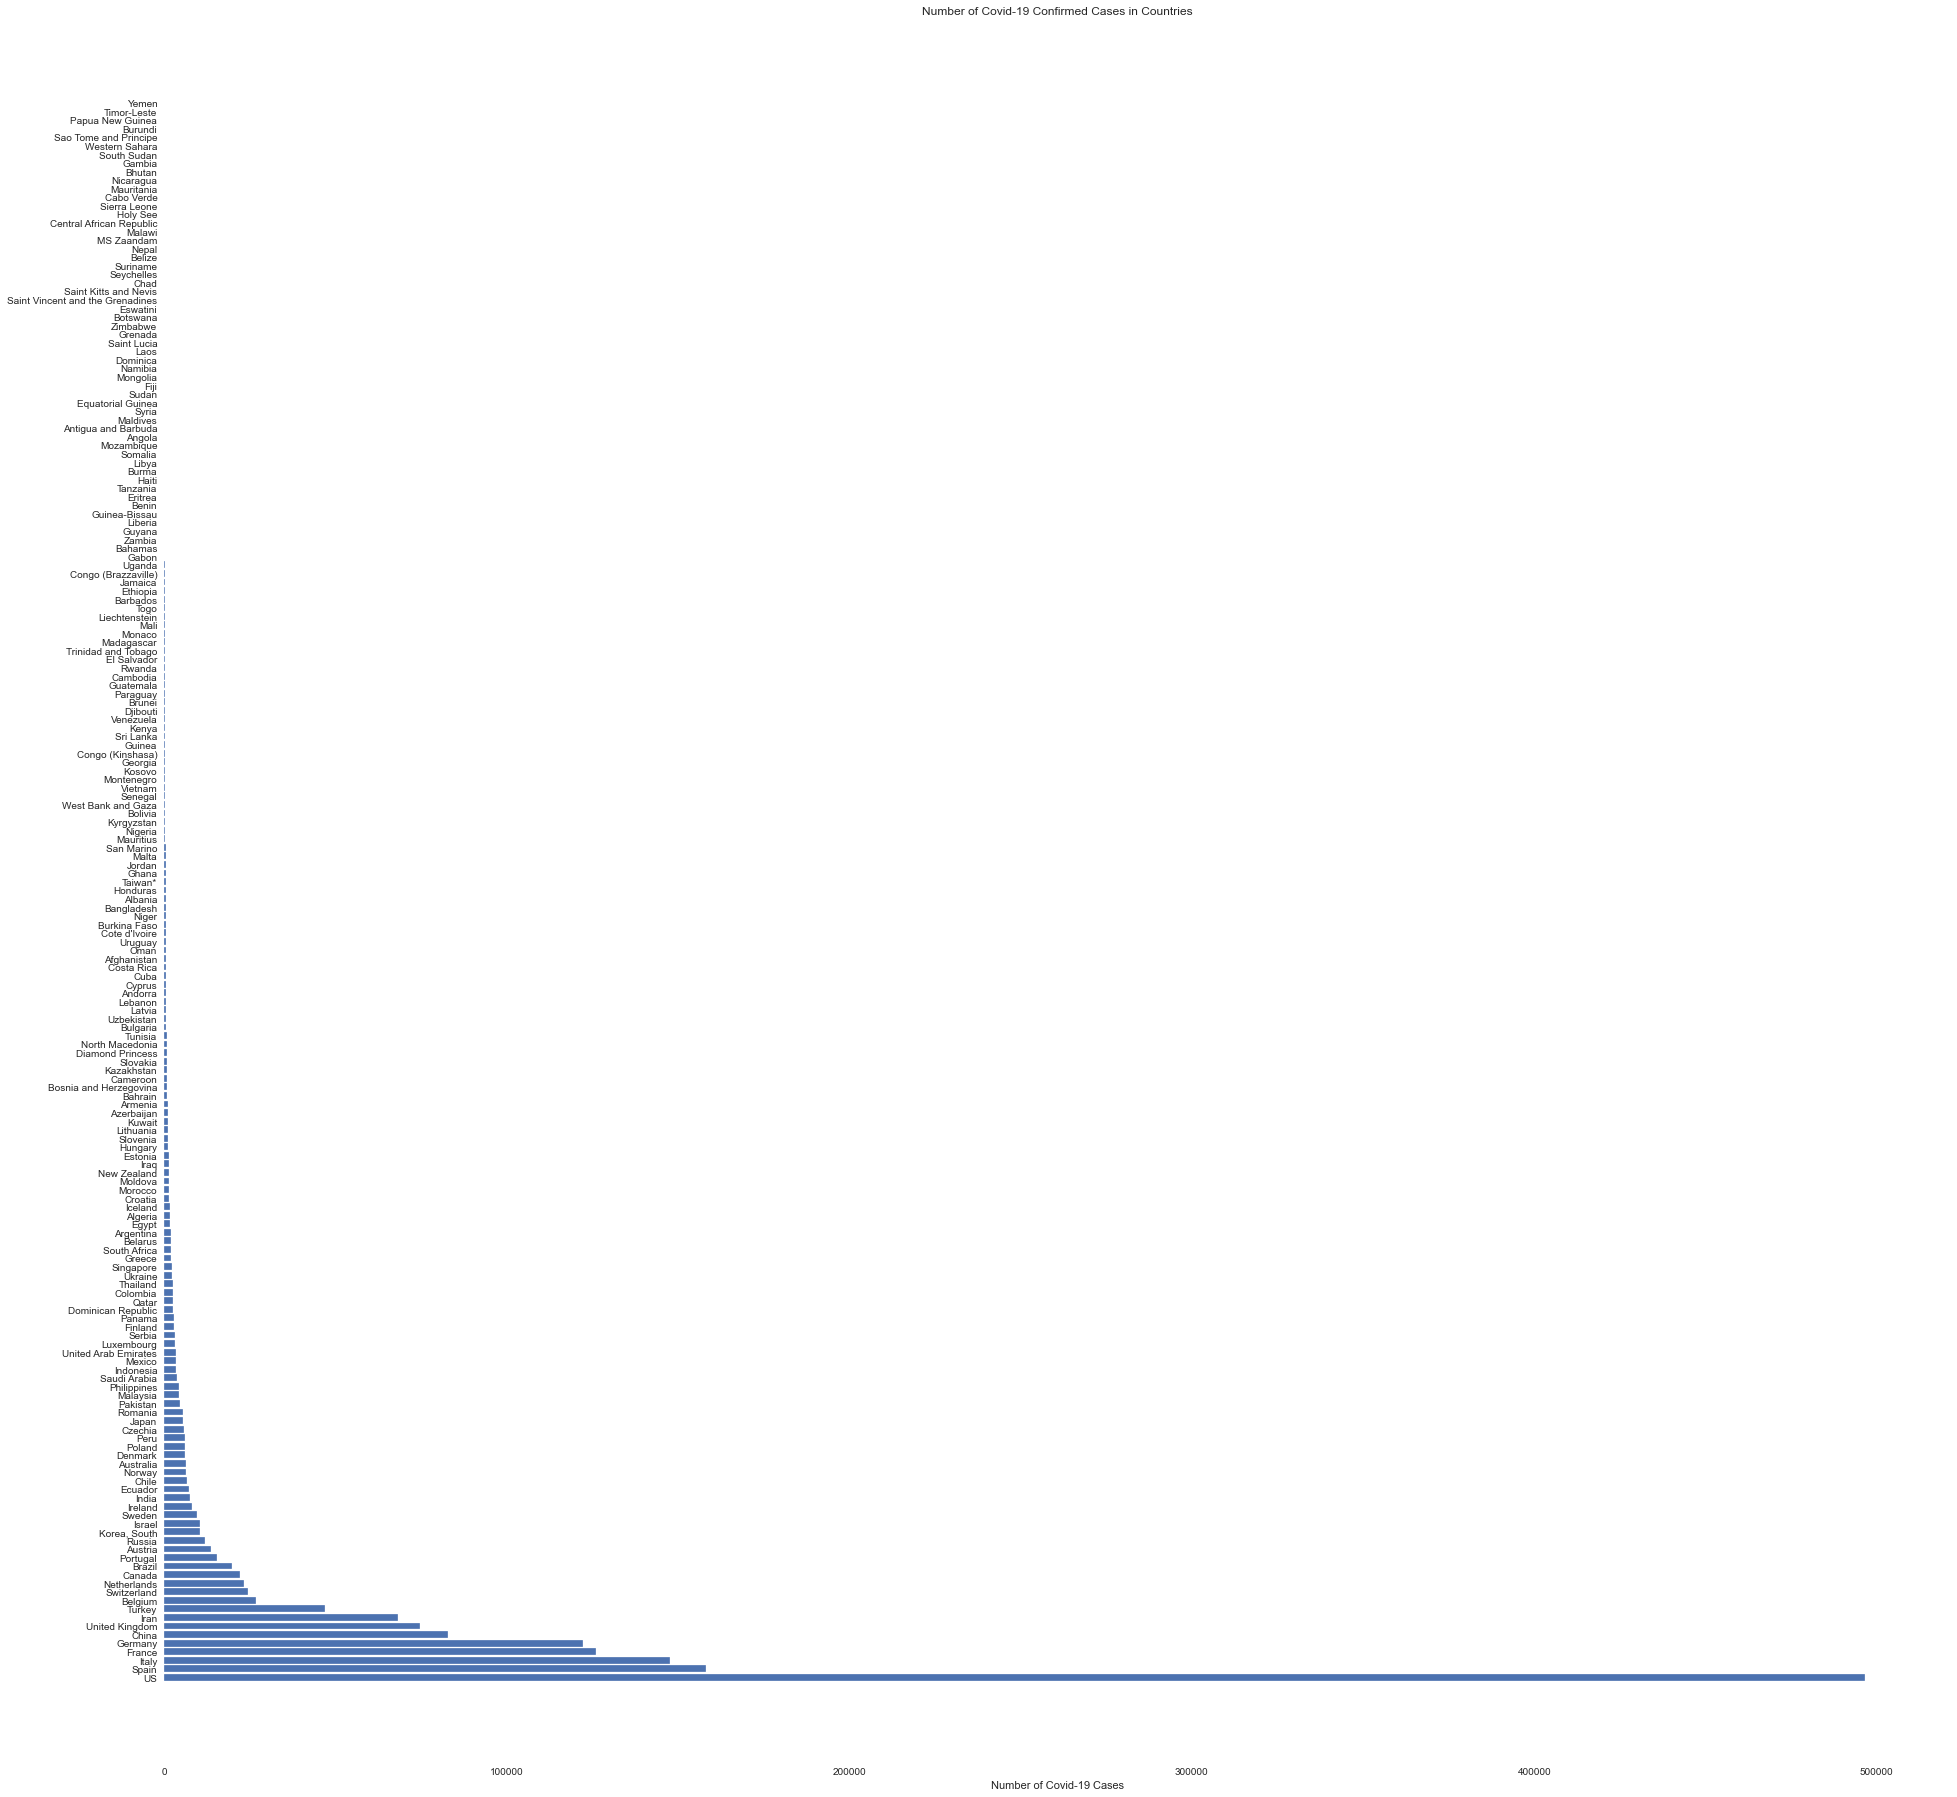

In [68]:
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid-19 Cases')
plt.savefig('worldwide_cases.png')

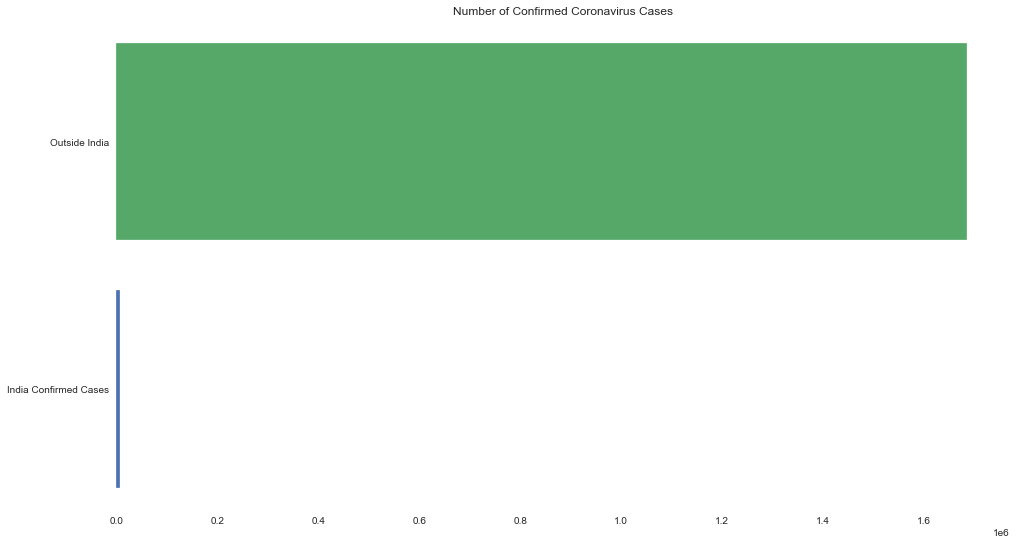

In [69]:
india_confirmed=latest_confirmed[confirmed_cases['Country/Region']=='India'].sum()
outside_india_confirmed=np.sum(country_confirmed_cases) - india_confirmed
plt.figure(figsize=(16,9))
plt.barh('India Confirmed Cases',india_confirmed)
plt.barh('Outside India',outside_india_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.savefig('indiavsworldcases.png')

In [70]:
print('No of cases in India : ',india_confirmed)
print('No of cases outside India : ',outside_india_confirmed)
print('Total no of cases : ',india_confirmed+outside_india_confirmed)


No of cases in India :  7598
No of cases outside India :  1684121
Total no of cases :  1691719


In [71]:
visual_unique_countries=[]
visual_confired_cases=[]
others=np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confired_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confired_cases.append(others)
visual_unique_countries_confirmed_cases_dict=dict(zip(visual_unique_countries,visual_confired_cases))
print(visual_unique_countries_confirmed_cases_dict)

{'US': 496535, 'Spain': 158273, 'Italy': 147577, 'France': 125931, 'Germany': 122171, 'China': 82941, 'United Kingdom': 74605, 'Iran': 68192, 'Turkey': 47029, 'Belgium': 26667, 'Others': 341798}


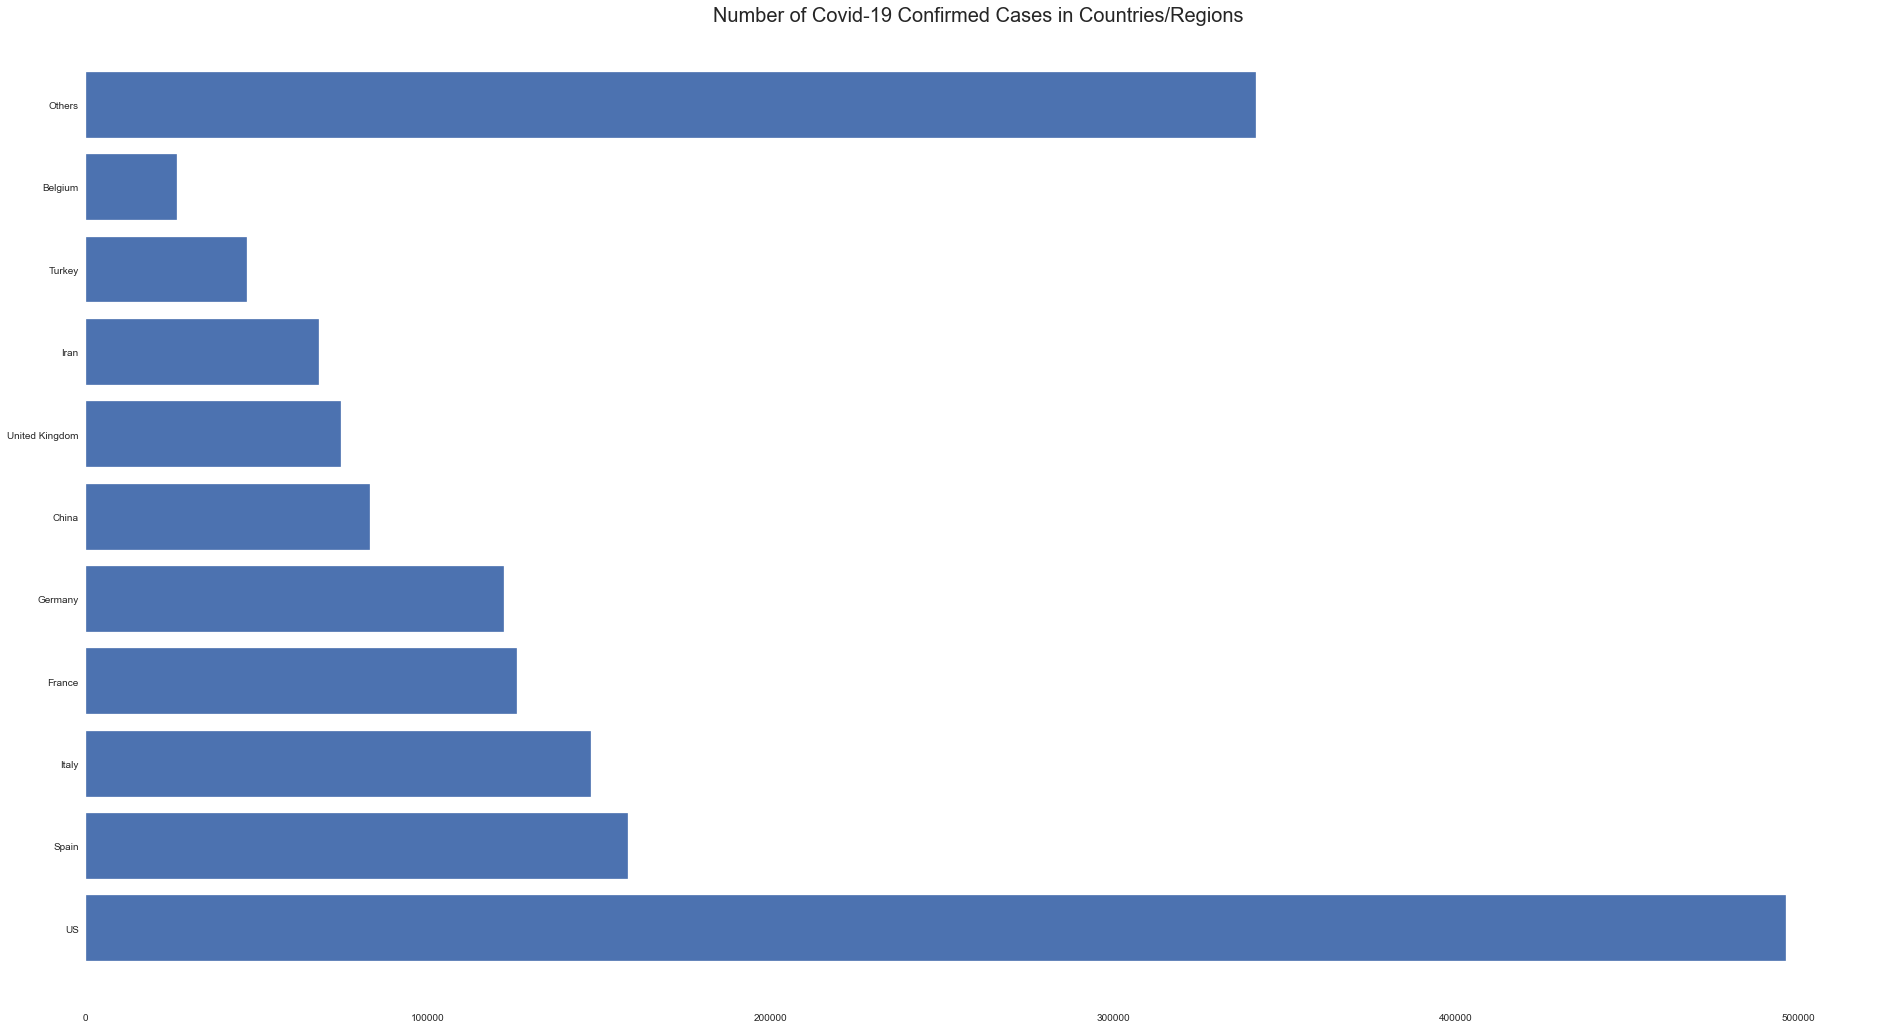

In [72]:
plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries,visual_confired_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions',size=20)
plt.savefig('10countriescases.png')

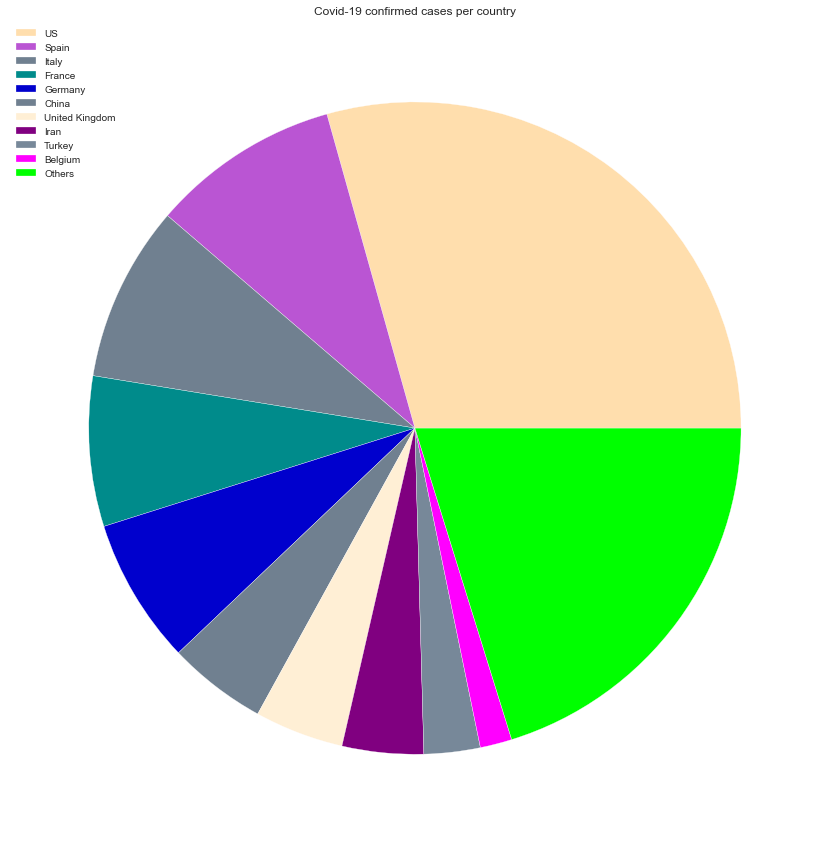

In [73]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(15,15))
plt.title('Covid-19 confirmed cases per country')
plt.pie(visual_confired_cases,colors=c)
plt.legend(visual_unique_countries,loc='best')
plt.savefig('piechart_10countries.png')

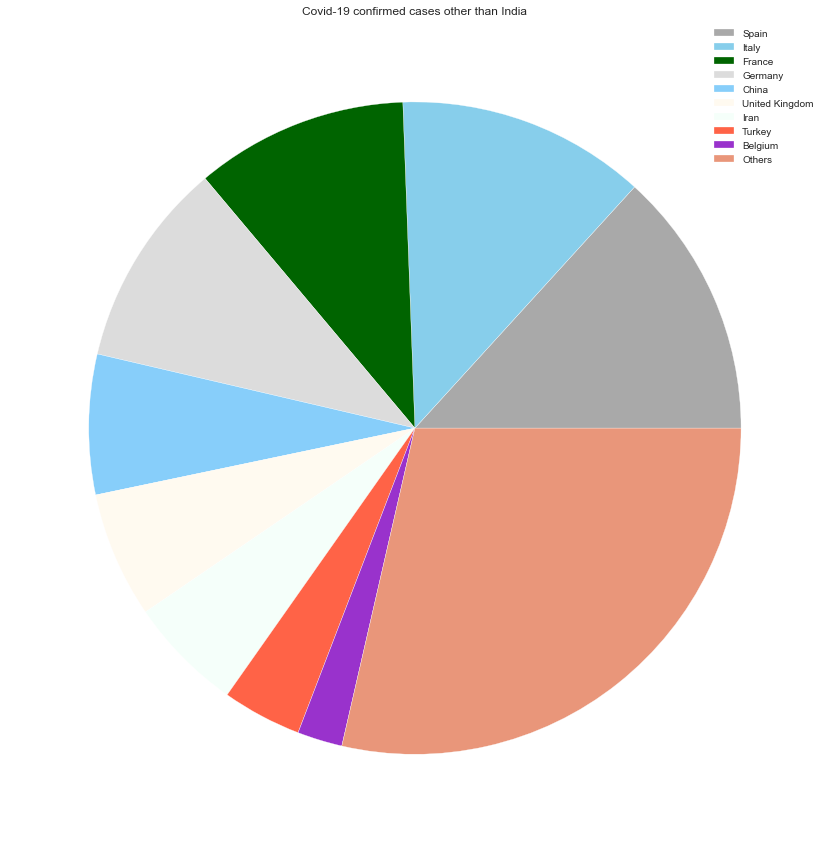

In [74]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(15,15))
plt.title('Covid-19 confirmed cases other than India')
plt.pie(visual_confired_cases[1:],colors=c)
plt.legend(visual_unique_countries[1:],loc='best')
plt.savefig('piechart_otherthanindia.png')

In [75]:
#Support Vector Machine(SVM) Model
kernel=['poly','sigmoid','rbf']
c=[0.01,0.1,1,10]
gamma=[0.01,0.1,1]
epsilon=[0.01,0.1,1]
shrinking=[True,False]
svm_grid={'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size = 0.15,shuffle=False)


svm=SVR()
svm_search=RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)
svm_search.fit(X_train_confirmed,y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    3.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   15.9s finished
C:\Users\HARDIK\anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [76]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.01, 'C': 10}

In [77]:
svm_confirmed=svm_search.best_estimator_
svm_pred=svm_confirmed.predict(future_forecast)

In [78]:
svm_confirmed

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [79]:
svm_pred

array([  17349.76402236,   17351.2288522 ,   17361.48266108,
         17389.3144281 ,   17443.51313211,   17532.86775256,
         17666.16726829,   17852.20065833,   18099.75690032,
         18417.62497665,   18814.59386398,   19299.45254089,
         19880.98998977,   20567.99518539,   21369.25711013,
         22293.56474258,   23349.70704604,   24546.47303726,
         25892.65165664,   27397.03190566,   29068.40275527,
         30915.55320693,   32947.27217056,   35172.34870864,
         37599.57176162,   40237.73033096,   43095.61332656,
         46182.00981094,   49505.70872451,   53075.49906875,
         56900.16978408,   60988.50981094,   65349.30821182,
         69991.35411025,   74923.4361415 ,   80154.34349014,
         85692.86509658,   91547.78990127,   97727.90708877,
        104242.00547744,  111098.87388564,  118307.30162002,
        125876.07749893,  133813.99009658,  142129.82920791,
        150832.38340713,  159930.4415126 ,  169432.79283096,
        179348.22593643,

MAE: 623897.7520095379
MSE: 430309774615.5681


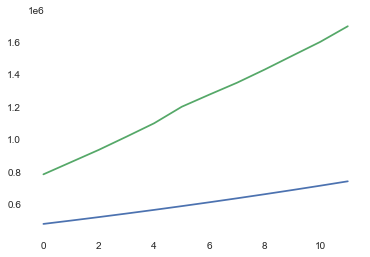

In [80]:
svm_test_pred=svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:',mean_absolute_error(svm_test_pred,y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred,y_test_confirmed))

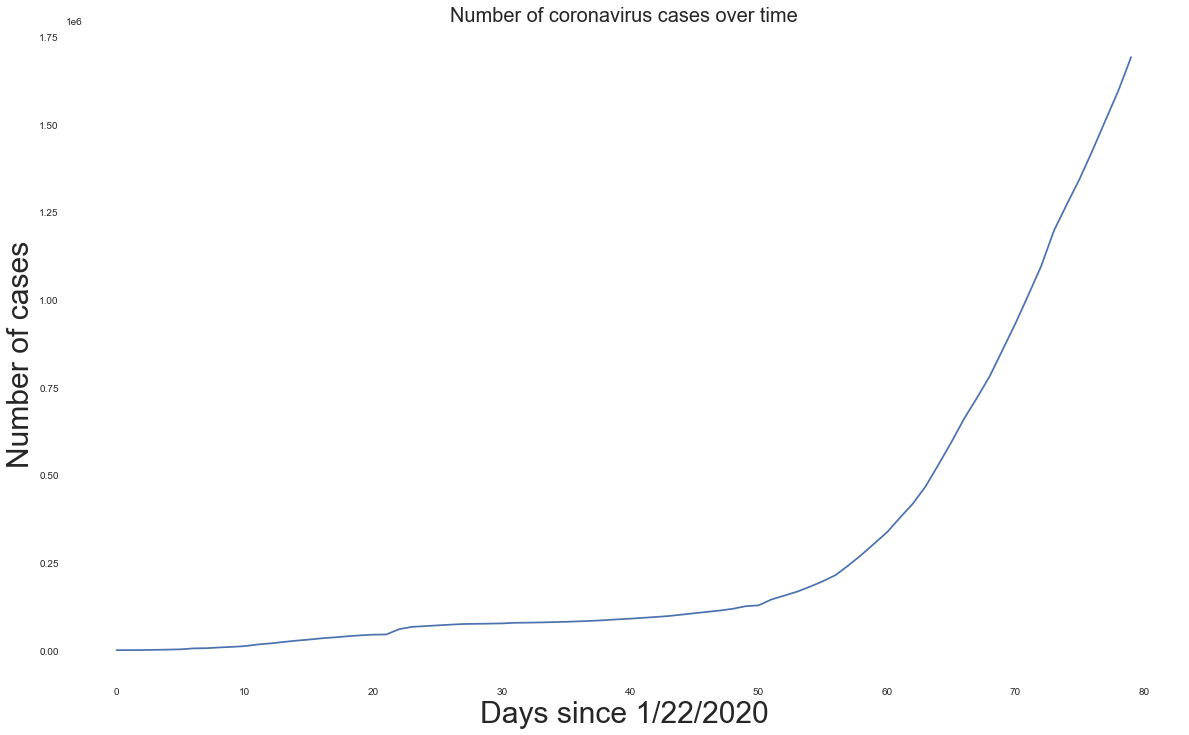

In [81]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.title('Number of coronavirus cases over time',size=20)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of cases',size=30)
plt.savefig('predicted.png')

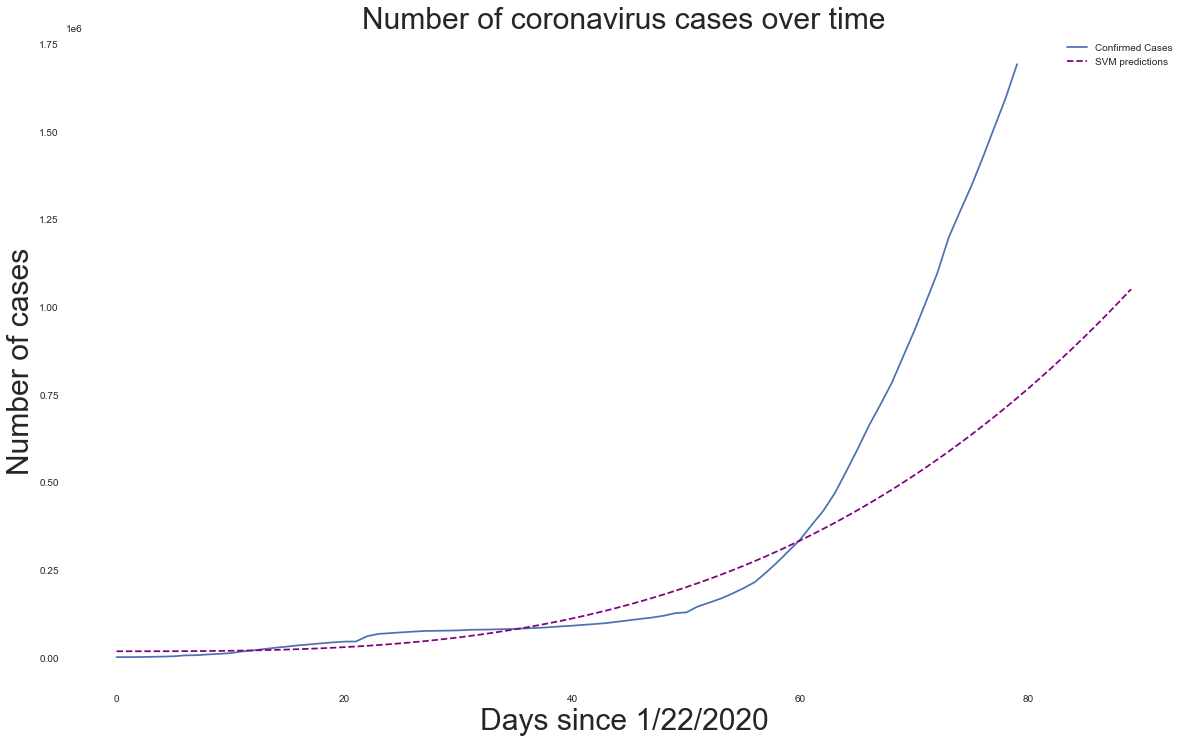

In [82]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='purple')
plt.title('Number of coronavirus cases over time',size=30)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of cases',size=30)
plt.legend(['Confirmed Cases','SVM predictions'])
plt.savefig('prediction_over_time.png')

In [83]:
print('SVM future predictions:')
set(zip(future_forecast_dates[-10:],svm_pred[-10:])) #prediction of next 10 days

SVM future predictions:


{('04/11/2020', 767342.642928613),
 ('04/12/2020', 795820.400741113),
 ('04/13/2020', 825010.064803613),
 ('04/14/2020', 854920.426131738),
 ('04/15/2020', 885560.271834863),
 ('04/16/2020', 916938.390975488),
 ('04/17/2020', 949063.572616113),
 ('04/18/2020', 981944.609725488),
 ('04/19/2020', 1015590.285506738),
 ('04/20/2020', 1050009.392928613)}

In [84]:
#Prediction using Linear Regression
from sklearn.linear_model import LinearRegression 
linear_model=LinearRegression(normalize=True,fit_intercept=True)
linear_model.fit(X_train_confirmed,y_train_confirmed)
test_linear_pred=linear_model.predict(X_test_confirmed)
linear_pred=linear_model.predict(future_forecast)
print('MAE:',mean_absolute_error(test_linear_pred,y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred,y_test_confirmed))

MAE: 834984.5113562621
MSE: 765978878205.6976


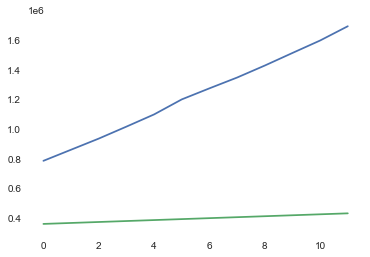

In [85]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

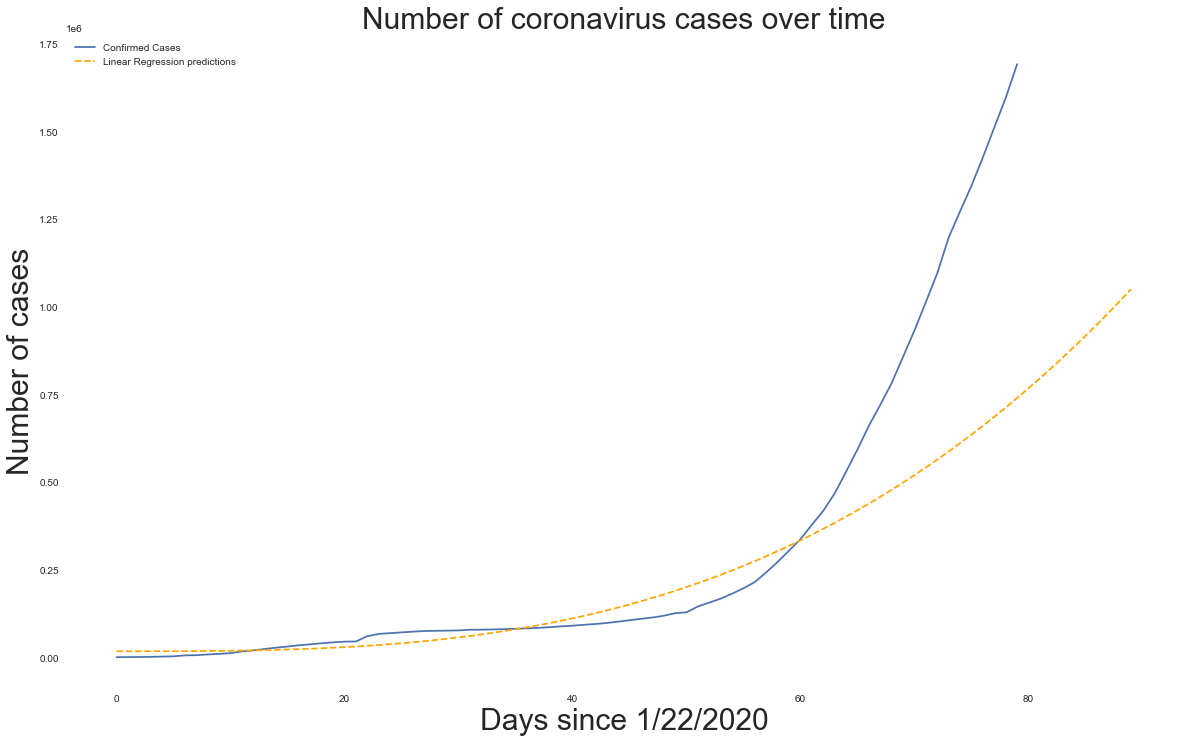

In [86]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='orange')
plt.title('Number of coronavirus cases over time',size=30)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of cases',size=30)
plt.legend(['Confirmed Cases','Linear Regression predictions'])
plt.savefig('prediction_over_time_LR.png')

In [87]:
print('Linear Regression future predictions')
print(linear_pred[-10:])

Linear Regression future predictions
[[433980.39672482]
 [440478.11335267]
 [446975.82998053]
 [453473.54660839]
 [459971.26323625]
 [466468.97986411]
 [472966.69649196]
 [479464.41311982]
 [485962.12974768]
 [492459.84637554]]


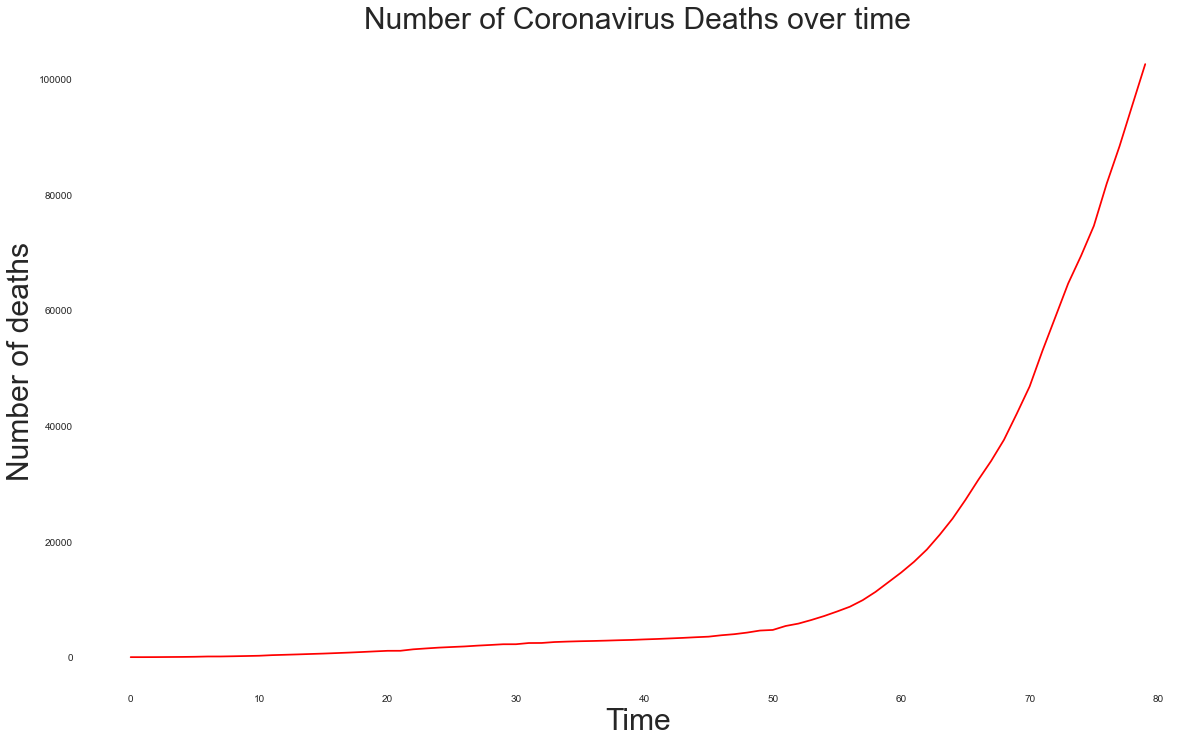

In [88]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_deaths,color='red')
plt.title('Number of Coronavirus Deaths over time',size=30)
plt.xlabel('Time',size=30)
plt.ylabel('Number of deaths',size=30)
plt.show()

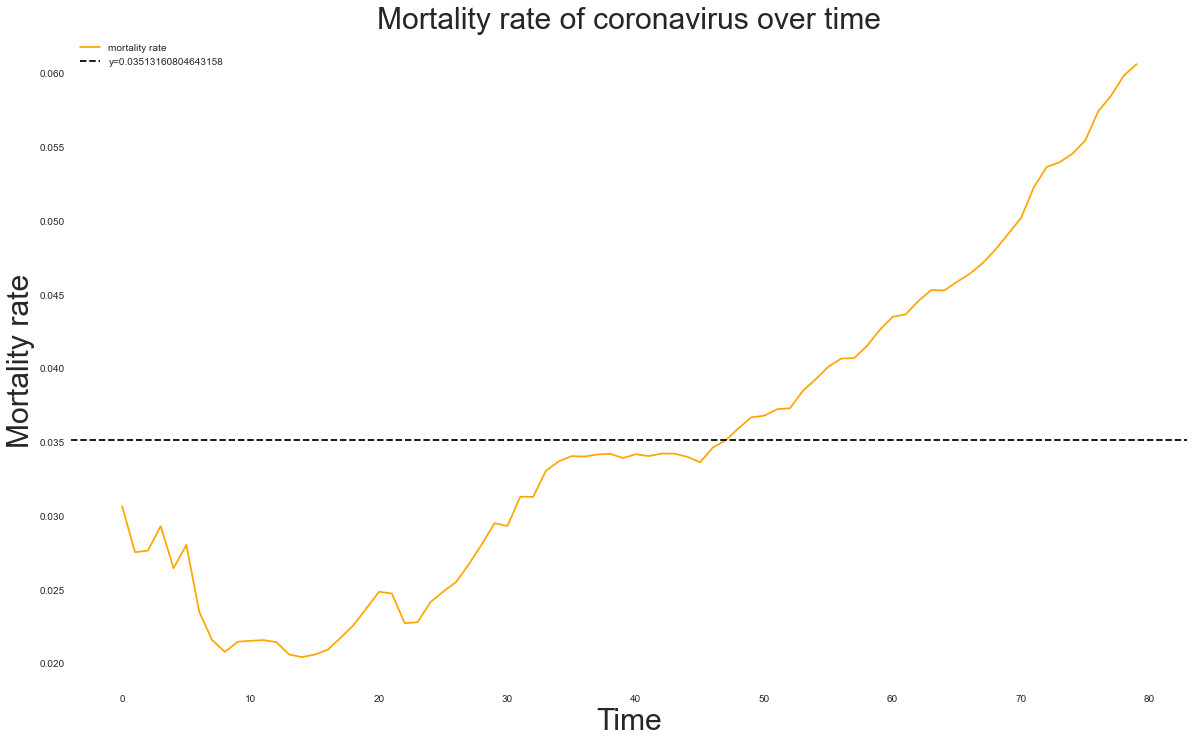

In [89]:
mean_mortality_rate=np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,mortality_rate,color='orange')
plt.axhline(y=mean_mortality_rate,linestyle='--',color='black')
plt.title('Mortality rate of coronavirus over time',size=30)
plt.legend(['mortality rate','y='+str(mean_mortality_rate)])
plt.xlabel('Time',size=30)
plt.ylabel('Mortality rate',size=30)
plt.show()

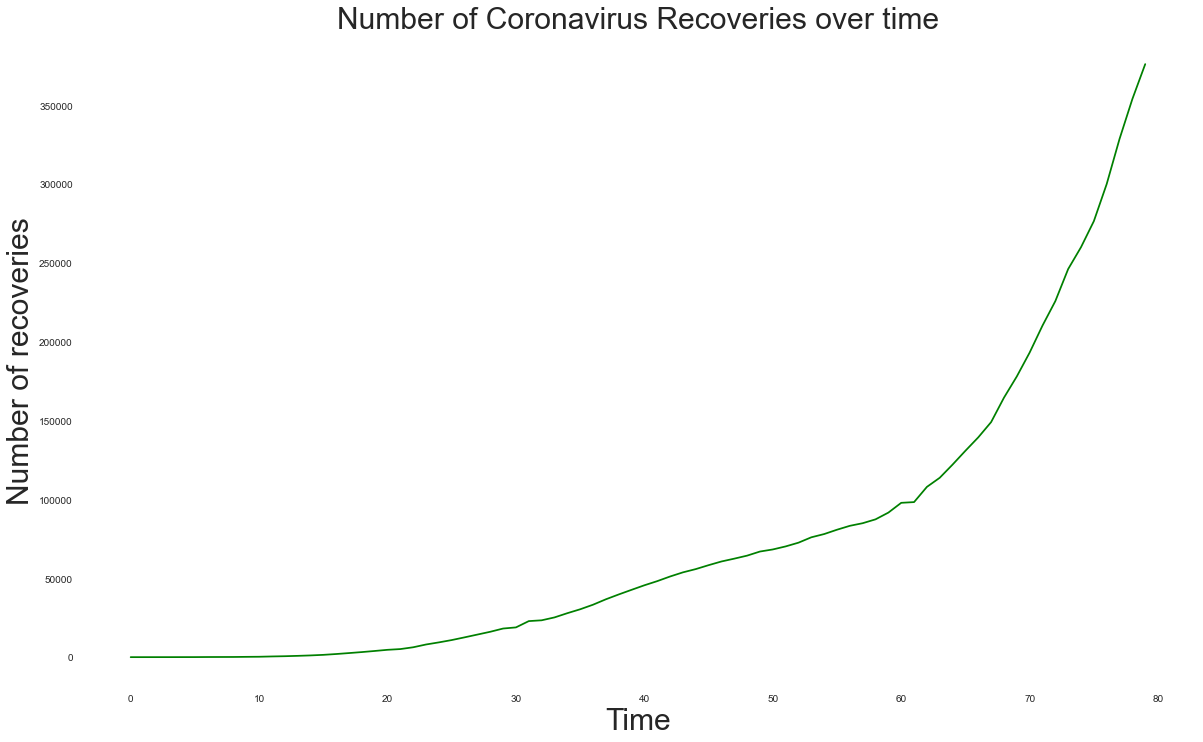

In [90]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_recovered,color='green')
plt.title('Number of Coronavirus Recoveries over time',size=30)
plt.xlabel('Time',size=30)
plt.ylabel('Number of recoveries',size=30)
plt.show()

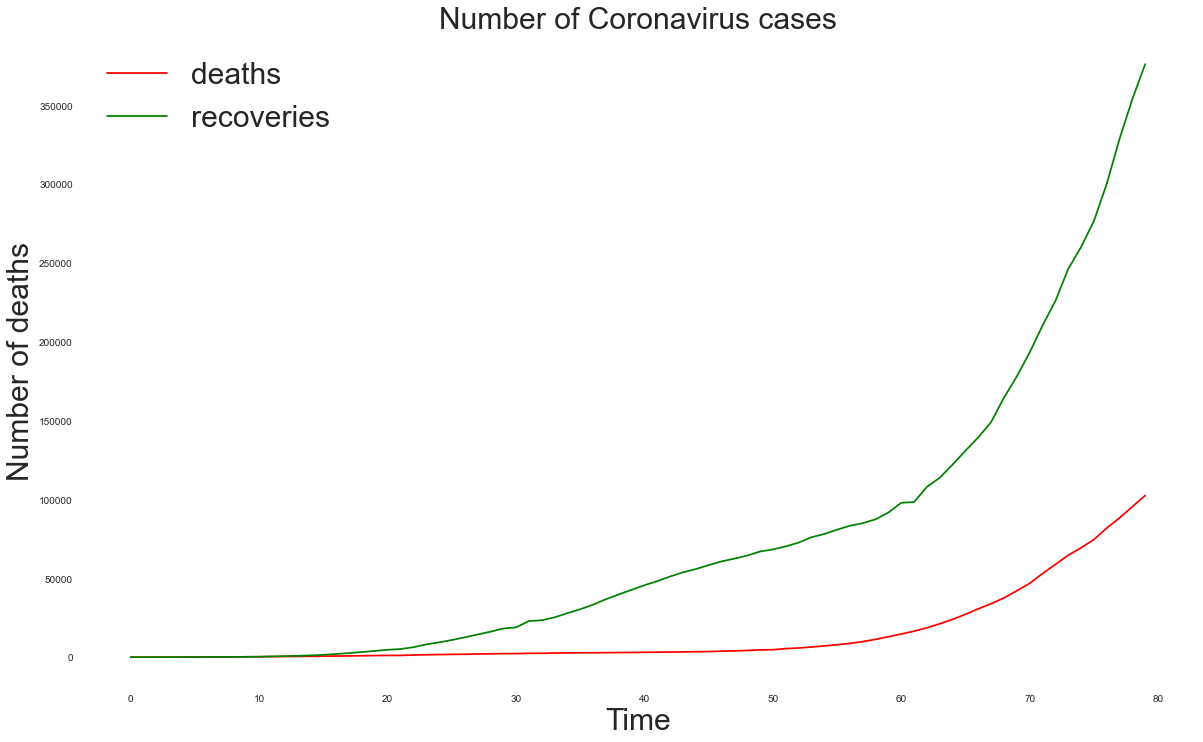

In [91]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_deaths,color='red')
plt.plot(adjusted_dates,total_recovered,color='green')
plt.legend(['deaths','recoveries'],loc='best',fontsize=30)
plt.title('Number of Coronavirus cases',size=30)
plt.xlabel('Time',size=30)
plt.ylabel('Number of deaths',size=30)
plt.show()

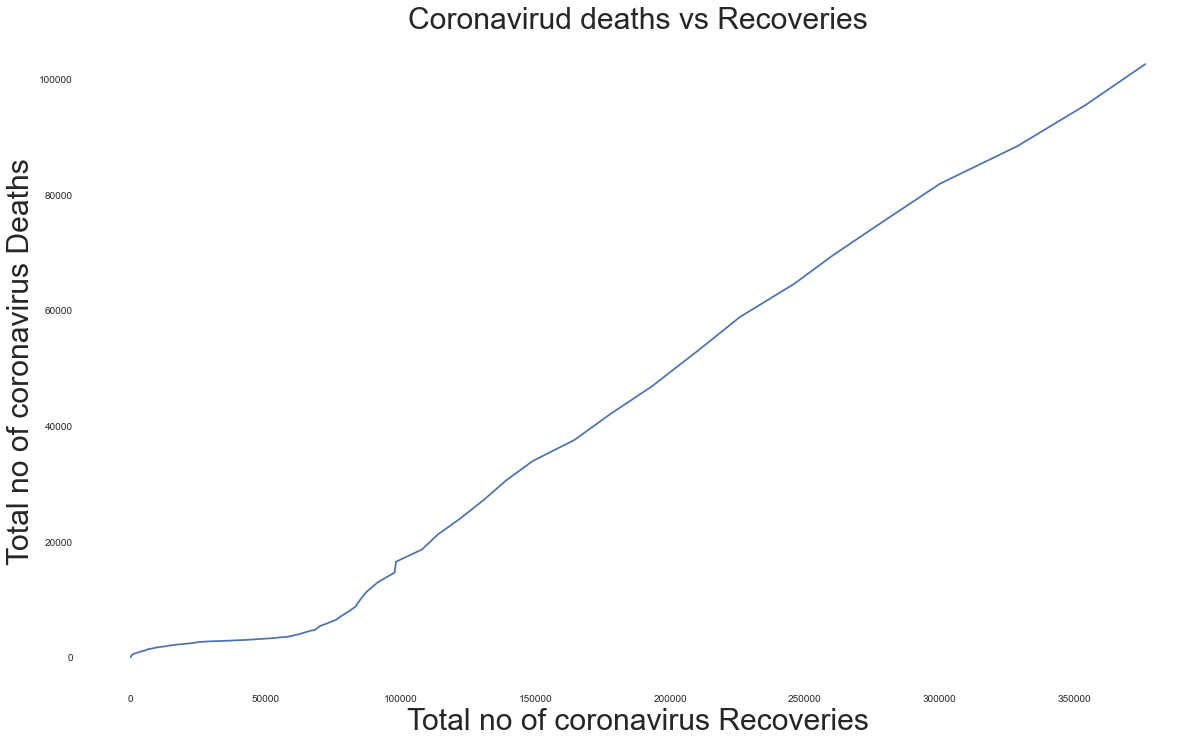

In [92]:
plt.figure(figsize=(20,12))
plt.plot(total_recovered,total_deaths)
plt.title('Coronavirud deaths vs Recoveries',size=30)
plt.xlabel('Total no of coronavirus Recoveries',size=30)
plt.ylabel('Total no of coronavirus Deaths',size=30)
plt.show()

In [93]:
import statsmodels.api as sm
x = sm.add_constant(days_since_1_22)
results = sm.OLS(endog = world_cases, exog=x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     127.8
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           4.20e-18
Time:                        12:06:32   Log-Likelihood:                -1112.8
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      78   BIC:                             2234.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.861e+05   5.97e+04     -4.796      0.000   -4.05e+05   -1.67e+05
x1          1.474e+04   1303.749     11.304      0.000    1.21e+04    1.73e+04
==============================================================================
Omnibus:                       11.271   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.577
Skew:                           0.894   Prob(JB):                      0.00306
Kurtosis:                       3.528   Cond. No.                         90.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""